In [1]:
import pandas as pd
import folium
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
stop = stopwords.words("portuguese")
from conf import lendo_dataset

In [2]:
customers = lendo_dataset("customers")
order_items = lendo_dataset('order_items')
orders = lendo_dataset("orders")
produtos = lendo_dataset("products")
vendedores = lendo_dataset("sellers")
orders_payments = lendo_dataset("order_payments")
order_reviews = lendo_dataset("order_reviews")
geo = lendo_dataset("geolocation")


In [72]:
seller_items = order_items.merge(vendedores,on='seller_id')
seller_orders = seller_items.merge(orders,on='order_id')
seller_orders_customers = seller_orders.merge(customers,on='customer_id')
seller_orders_cust_pay = seller_orders_customers.merge(orders_payments,on='order_id')

In [73]:
seller_orders_cust_pay.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'seller_zip_code_prefix', 'seller_city', 'seller_state', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value'],
      dtype='object')

In [74]:
# vend_pay = seller_orders_cust_pay[['order_id','product_id', 'seller_id',
#        'shipping_limit_date', 'price', 'freight_value',
#        'seller_zip_code_prefix', 'seller_city', 'seller_state', 'customer_id',
#        'order_status', 'order_purchase_timestamp', 'order_approved_at',
#        'order_delivered_carrier_date', 'order_delivered_customer_date',
#        'order_estimated_delivery_date','customer_unique_id',
#        'customer_zip_code_prefix', 'customer_city', 'customer_state',
#        'payment_sequential', 'payment_type', 'payment_installments',
#        'payment_value']]

In [75]:
vend_pay_reviews.columns

Index(['order_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm'],
      dt

In [67]:
vend_pay_reviews = vend_pay.merge(order_reviews,on='order_id')
vend_pay_reviews = vend_pay_reviews.merge(produtos, on='product_id')
vend_pay_reviews = vend_pay_reviews.merge(produtos, on='product_id')
vend_pay_reviews = pd.merge(vend_pay_reviews,geo.rename(columns={'geolocation_zip_code_prefix':'customer_zip_code_prefix'}), on='customer_zip_code_prefix').drop_duplicates(subset='customer_unique_id')

In [30]:
detratores = vend_pay_reviews.loc[vend_pay_reviews['review_score']<=2]

In [31]:
detratores=detratores[['seller_city','seller_state', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date','customer_city', 'customer_unique_id','customer_state','review_comment_message']]

In [32]:
total = detratores['seller_city'].count()

In [33]:
seller_dif = detratores.loc[(detratores['seller_state']!=detratores['customer_state']),'seller_state'].count()

In [34]:
(seller_dif/total)*100

69.40948693126815

In [36]:
detratores.groupby('customer_state').agg({'customer_unique_id':'count'}).reset_index()

customer_state  customer_unique_id
0              AC                  15
1              AL                 117
2              AM                  32
3              AP                   6
4              BA                 848
5              CE                 329
6              DF                 428
7              ES                 405
8              GO                 428
9              MA                 209
10             MG                2063
11             MS                 137
12             MT                 212
13             PA                 247
14             PB                 116
15             PE                 350
16             PI                 116
17             PR                 893
18             RJ                3548
19             RN                  96
20             RO                  47
21             RR                  13
22             RS                1040
23             SC                 728
24             SE                  88
25             SP                7074
26             TO                  42

In [37]:
promotores = vend_pay_reviews.loc[vend_pay_reviews['review_score']>=4]

In [38]:
total = promotores['seller_city'].count()
seller_dif = promotores.loc[(promotores['seller_state']!=promotores['customer_state']),'seller_state'].count()
(seller_dif/total)*100

62.405040463470165

In [39]:
promotores.groupby('customer_state').agg({'customer_unique_id':'count'}).reset_index()

customer_state  customer_unique_id
0              AC                  71
1              AL                 313
2              AM                 132
3              AP                  69
4              BA                2792
5              CE                1081
6              DF                1871
7              ES                1731
8              GO                1791
9              MA                 554
10             MG               10483
11             MS                 656
12             MT                 792
13             PA                 765
14             PB                 469
15             PE                1397
16             PI                 407
17             PR                4639
18             RJ               10596
19             RN                 431
20             RO                 210
21             RR                  31
22             RS                4974
23             SC                3192
24             SE                 278
25             SP               38732
26             TO                 265

In [41]:
detratores = detratores.dropna(subset=['review_comment_message'])
promotores = promotores.dropna(subset=['review_comment_message'])


In [44]:
detratores['review_comment_message'] = detratores['review_comment_message'].astype(str)
detratores['review_comment_message'] = detratores['review_comment_message'].str.lower().str.split()

detratores['review_comment_message'] = detratores['review_comment_message'].apply(lambda x: ' '.join([item for item in x if item not in stop]))

promotores['review_comment_message'] = promotores['review_comment_message'].astype(str)
promotores['review_comment_message'] = promotores['review_comment_message'].str.lower().str.split()

promotores['review_comment_message'] = promotores['review_comment_message'].apply(lambda x: ' '.join([item for item in x if item not in stop]))

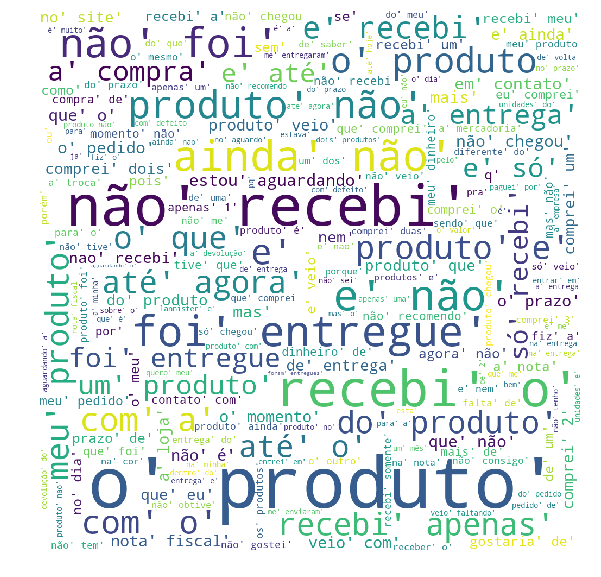

In [50]:
comment_words = '' 
for val in detratores['review_comment_message']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                stopwords = stop, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

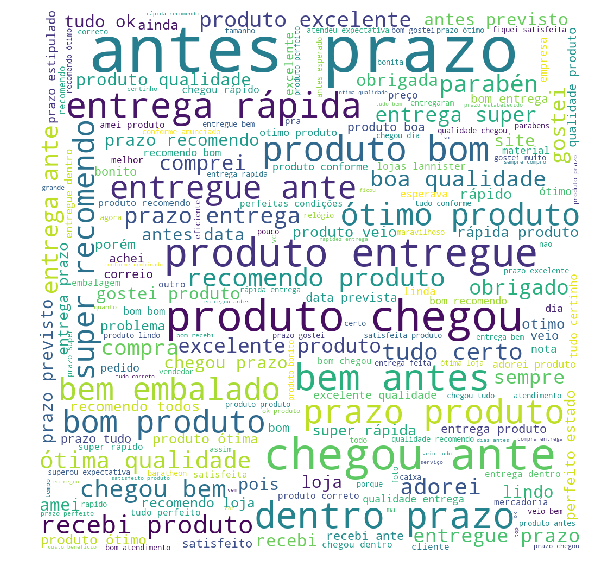

In [51]:
comment_words = '' 
for val in promotores['review_comment_message']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                stopwords = stop, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

In [53]:
detratores.columns

Index(['seller_city', 'seller_state', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_city', 'customer_unique_id', 'customer_state',
       'review_comment_message'],
      dtype='object')